In [1]:
%matplotlib inline
from IPython.display import display, Math, Latex

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('kegelapan.jpg')

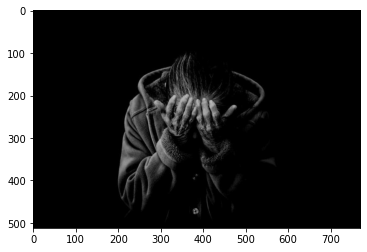

In [2]:
# display the image
plt.imshow(img, cmap='gray')

In [3]:
# convert image into a numpy array
img = np.asarray(img)

(array([1.005591e+06, 1.929900e+04, 1.241700e+04, 9.600000e+03,
        8.043000e+03, 7.467000e+03, 6.714000e+03, 4.731000e+03,
        5.952000e+03, 5.616000e+03, 5.562000e+03, 5.274000e+03,
        5.427000e+03, 5.238000e+03, 3.771000e+03, 4.941000e+03,
        4.809000e+03, 4.575000e+03, 4.398000e+03, 3.981000e+03,
        3.813000e+03, 2.823000e+03, 3.486000e+03, 3.468000e+03,
        3.270000e+03, 2.922000e+03, 2.946000e+03, 2.523000e+03,
        1.740000e+03, 2.427000e+03, 2.220000e+03, 2.151000e+03,
        2.214000e+03, 1.887000e+03, 1.599000e+03, 1.230000e+03,
        1.491000e+03, 1.248000e+03, 1.026000e+03, 8.640000e+02,
        7.770000e+02, 6.390000e+02, 4.650000e+02, 6.330000e+02,
        5.400000e+02, 3.720000e+02, 2.880000e+02, 1.830000e+02,
        6.000000e+01, 9.000000e+00]),
 array([  0.  ,   3.86,   7.72,  11.58,  15.44,  19.3 ,  23.16,  27.02,
         30.88,  34.74,  38.6 ,  42.46,  46.32,  50.18,  54.04,  57.9 ,
         61.76,  65.62,  69.48,  73.34,  77.2 ,  8

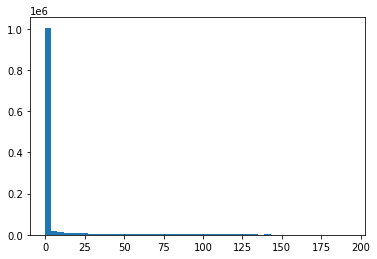

In [4]:
# put pixels in a 1D array by flattening out img array
flat = img.flatten()

# show the histogram
plt.hist(flat, bins=50)

In [5]:
# formula for creating the histogram
display(Math(r'P_x(j) = \sum_{i=0}^{j} P_x(i)'))

<IPython.core.display.Math object>

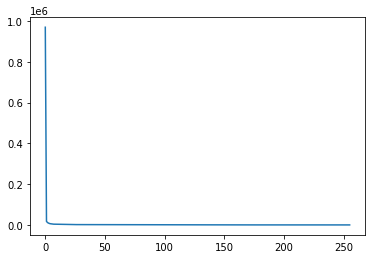

In [6]:
# create our own histogram function
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

hist = get_histogram(flat, 256)

plt.plot(hist)

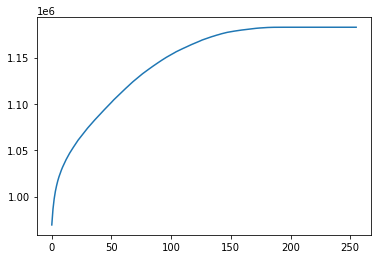

In [7]:
# create our cumulative sum function
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# execute the fn
cs = cumsum(hist)

# display the result
plt.plot(cs)

In [8]:
# formula to calculate cumulation sum
display(Math(r's_k = \sum_{j=0}^{k} {\frac{n_j}{N}}'))

<IPython.core.display.Math object>

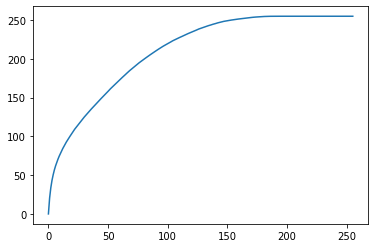

In [9]:
# re-normalize cumsum values to be between 0-255

# numerator & denomenator
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

# re-normalize the cdf
cs = nj / N

plt.plot(cs)

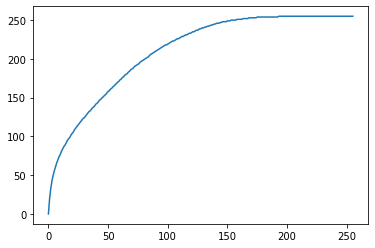

In [10]:
# cast it back to uint8 since we can't use floating point values in images
cs = cs.astype('uint8')

plt.plot(cs)

(array([969348.,      0.,      0.,  17100.,      0.,      0.,  11079.,
             0.,   8064.,   6087.,   5199.,   4347.,   3666.,   3528.,
          3171.,   5718.,   2541.,   4782.,   4365.,   4023.,   5862.,
          3537.,   5055.,   3186.,   4698.,   4458.,   4197.,   4176.,
          4164.,   3915.,   5427.,   4020.,   4989.,   3705.,   3534.,
          4893.,   4401.,   4182.,   3921.,   4704.,   4377.,   4338.,
          4431.,   4197.,   4245.,   3909.,   4410.,   4176.,   4215.,
          4380.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <BarContainer object of 50 artists>)

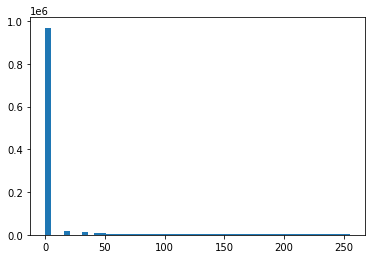

In [11]:
# get the value from cumulative sum for every index in flat, and set that as img_new
img_new = cs[flat]

# we see a much more evenly distributed histogram
plt.hist(img_new, bins=50)

In [12]:
# put array back into original shape since we flattened it
img_new = np.reshape(img_new, img.shape)
img_new

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

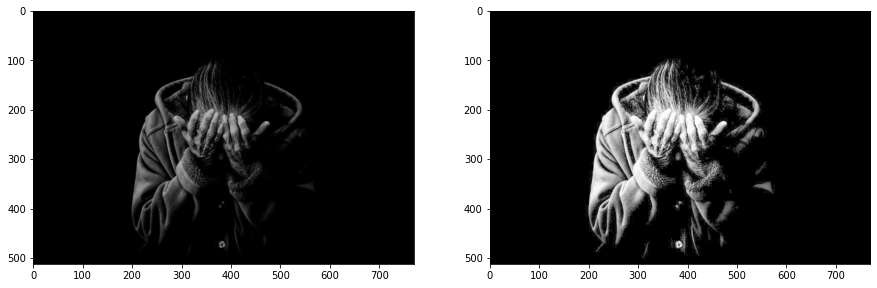

In [13]:
# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap='gray')

plt.show(block=True)